<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/LS_DS2_234_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Ridge Regression

Regularize your way to a better tomorrow.

# Lecture

Data science depends on math, and math is generally focused on situations where:

1. a solution exists,
2. the solution is unique,
3. the solution's behavior changes continuously with the initial conditions.

These are known as [well-posed problems](https://en.wikipedia.org/wiki/Well-posed_problem), and are the sorts of assumptions so core in traditional techniques that it is easy to forget about them. But they do matter, as there can be exceptions:

1. no solution - e.g. no $x$ such that $Ax = b$
2. multiple solutions - e.g. several $x_1, x_2, ...$ such that $Ax = b$
3. "chaotic" systems - situations where small changes in initial conditions interact and reverberate in essentially unpredictable ways - for instance, the difficulty in longterm predictions of weather (N.B. not the same thing as longterm predictions of *climate*) - you can think of this as models that fail to generalize well, because they overfit on the training data (the initial conditions)

Problems suffering from the above are called ill-posed problems. Relating to linear algebra and systems of equations, the only truly well-posed problems are those with a single unique solution.

![Intersecting lines](https://upload.wikimedia.org/wikipedia/commons/c/c0/Intersecting_Lines.svg)

Think for a moment - what would the above plot look like if there was no solution? If there were multiple solutions? And how would that generalize to higher dimensions?

# Well-Posed problems in Linear Algebra

A lot of what you covered with linear regression was about getting matrices into the right shape for them to be solvable in this sense. But some matrices just won't submit to this, and other problems may technically "fit" linear regression but still be violating the above assumptions in subtle ways.

[Overfitting](https://en.wikipedia.org/wiki/Overfitting) is in some ways a special case of this - an overfit model uses more features/parameters than is "justified" by the data (essentially by the *dimensionality* of the data, as measured by $n$ the number of observations). As the number of features approaches the number of observations, linear regression still "works", but it starts giving fairly perverse results. In particular, it results in a model that fails to *generalize* - and so the core goal of prediction and explanatory power is undermined.

How is this related to well and ill-posed problems? It's not clearly a no solution or multiple solution case, but it does fall in the third category - overfitting results in fitting to the "noise" in the data, which means the particulars of one random sample or another (different initial conditions) will result in dramatically different models.

## Two Equations with Two Unknowns (well-posed)

\begin{align}
x-y = -1
\end{align}
\begin{align}
3x+y = 9
\end{align}
\begin{align}
\begin{bmatrix}
1 & -1 \\
3 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
9
\end{bmatrix}
\end{align}

In [23]:
import numpy as np
A = np.array([[1, -1], [3, 1]])
b = [[-1],[9]]

solution = np.linalg.solve(A, b)
print(solution)

x = solution[0][0]
y = solution[1][0]

print('\n')
print("x:", x)
print("y:", y)

[[2.]
 [3.]]


x: 2.0
y: 3.0


## Two Equations with Three Unknowns (not well-posed)
\begin{align}
x-y+z = -1
\end{align}
\begin{align}
3x+y-2z = 9
\end{align}
\begin{align}
\begin{bmatrix}
1 & -1 & 1 \\
3 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
9
\end{bmatrix}
\end{align}

In [24]:
import numpy as np
A = np.array([[1, -1, 1], [3, 1, -2]])
b = [[-1],[9]]

solution = np.linalg.solve(A, b)
print(solution)

LinAlgError: ignored



You can reduce these formulas, but there is no single solution, there are infinitely many solutions where the solution to at least one of these variables must be a function of the other variables.

Example:

<https://www.youtube.com/watch?v=tGPSEXVYw_o>

# Generalization in Machine Learning

The goal of machine learning is to end up with a model that can predict well on new data that it has never seen before. This is sometimes called "out of sample accuracy". This is what we are simulating when we do a train-test-split. We allow or model to fit to the training dataset and then we test its ability to generalize to new data by evaluating its accuracy on a test dataset. We want models that will be usable on new data indefinitely that way we can train them once and then reap the rewards of accurate predictions for a long time to come. 

## Underfitting
An underfit model will not perform well on the test data and will also not generalize to new data. Because of this, we can usually detect it easily (it just performs poorly in all situations). Because it's easy to identify we either remedy it quickly or move onto new methods. 

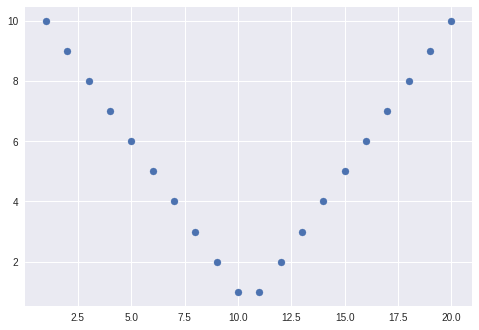

In [27]:
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = np.array([10,9,8,7,6,5,4,3,2,1,1,2,3,4,5,6,7,8,9,10])

import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

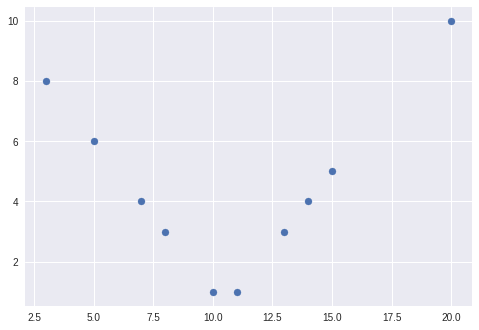

In [5]:
plt.scatter(X_train, y_train)
plt.show()

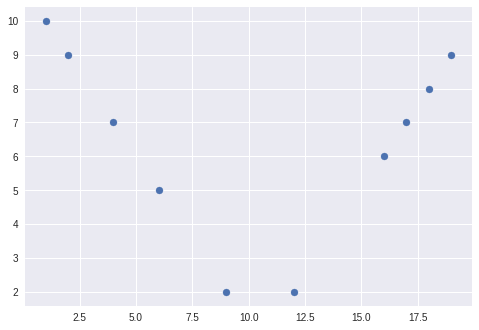

In [6]:
plt.scatter(X_test, y_test)
plt.show()

Slope Coefficient:  0.08532423208191127

Intercept Value:  3.5955631399317407


ValueError: ignored

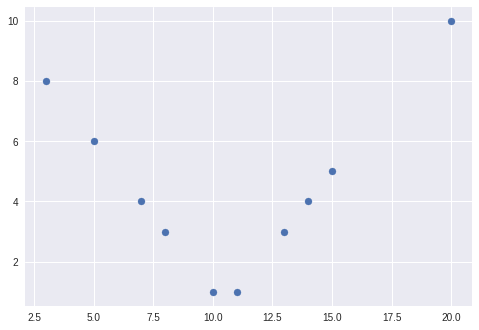

In [8]:
from sklearn.linear_model import LinearRegression

X_train = X_train.reshape(-1, 1)

model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print("Slope Coefficient: ", beta_1)
print("\nIntercept Value: ", beta_0)

plt.scatter(X_train, y_train)
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(x, y_hat)
plt.show()

ValueError: ignored

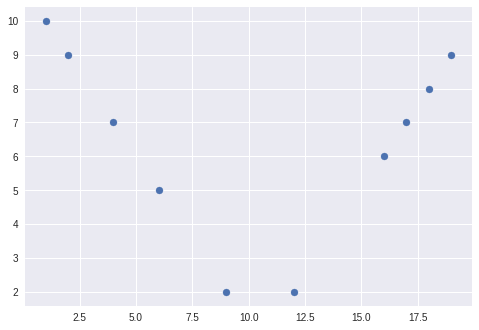

In [9]:
plt.scatter(X_test, y_test)
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(x, y_hat)
plt.show()

## Overfitting

Lets explore the problem of overfitting (and possible remedy - Ridge Regression) in the context of some housing data.

In [10]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

# Load and Scale the Data
boston = load_boston()
boston.data = scale(boston.data)  # Very helpful for regularization!

# Put it in a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


## preprocessing.scale(x) does the same thing as preprocessing.StandardScaler()

The difference is that `.scale(x)` is a function (lowercase naming convention)

`StandardScaler()` is a class (uppercase naming convention) with some extra functionality, they will both scale our data equally well. 

In [0]:
#?scale # Like StandardScaler but less functionality

In [12]:
from sklearn.preprocessing import StandardScaler

# Load and scale the data
boston = load_boston()
scaler = StandardScaler()
boston.data = scaler.fit_transform(boston.data)

# Put it in a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [13]:
df.shape

(506, 14)

## OLS Baseline Model

In [14]:
# Let's try good old least squares!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Price', axis='columns')
y = df.Price

lin_reg = LinearRegression().fit(X, y)
mean_squared_error(y, lin_reg.predict(X))

21.894831181729206

That seems like a pretty good score, but...

![Kitchen Sink](https://i.imgur.com/ZZxqhT1.jpg)

Chances are this doesn't generalize very well. You can verify this by splitting the data to properly test model validity.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
lin_reg_split = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y, lin_reg_split.predict(X)))
print(mean_squared_error(y_test, lin_reg_split.predict(X_test)))

# An overfit model performs well on training data and poorly on test data

22.347018673376052
26.273991426429014


Oops! 💥 - You have overfitting if you are fitting well to training data, but not generalizing well to test data.

### What can we do?

- Use fewer features - sure, but it can be a lot of work to figure out *which* features, and (in cases like this) there may not be any good reason to really favor some features over another.
- Get more data! This is actually a pretty good approach in tech, since apps generate lots of data all the time (and we made this situation by artificially constraining our data). But for case studies, existing data, etc. it won't work.
- **Regularize!**

## Regularization just means "add bias"

OK, there's a bit more to it than that. But that's the core intuition - the problem is the model working "too well", so fix it by making it harder for the model!

It may sound strange - a technique that is purposefully "worse" - but in certain situations, it can really get results.

What's bias? In the context of statistics and machine learning, bias is when a predictive model fails to identify relationships between features and the output. In a word, bias is *underfitting*.

We want to add bias to the model because of the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) - variance is the sensitivity of a model to the random noise in its training data (i.e. *overfitting*), and bias and variance are naturally (inversely) related. Increasing one will always decrease the other, with regards to the overall generalization error (predictive accuracy on unseen data).

Visually, the result looks like this:

![Regularization example plot](https://upload.wikimedia.org/wikipedia/commons/0/02/Regularization.svg)

The blue line is overfit, using more dimensions than are needed to explain the data and so much of the movement is based on noise and won't generalize well. The green line still fits the data, but is less susceptible to the noise - depending on how exactly we parameterize "noise" we may throw out actual correlation, but if we balance it right we keep that signal and greatly improve generalizability.

### Look carefully at the above plot and think of ways you can quantify the difference between the blue and green lines...


In [16]:
# Now with regularization via ridge regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge().fit(X, y)
mean_squared_error(y, ridge_reg.predict(X))

21.895862166800143

In [18]:
# The score is a bit worse than OLS - but that's expected (we're adding bias)
# Let's try split

ridge_reg_split = Ridge(alpha=0).fit(X_train, y_train) # need to set alpha param to change form OLS. Higher alpha, the more bias
mean_squared_error(y_test, ridge_reg_split.predict(X_test))

26.273991426429053

In [0]:
# A little better (to same test split w/OLS) - can we improve it further?
# We just went with defaults, but as always there's plenty of parameters
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds t

How to tune alpha? For now, let's loop and try values.

(For longterm/stretch/next week, check out [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).)

In [0]:
alphas = []
mses = []

for alpha in range(0, 200, 1):
  ridge_reg_split = Ridge(alpha=alpha).fit(X_train, y_train)
  mse = mean_squared_error(y_test, ridge_reg_split.predict(X_test))
  print(alpha, mse)
  alphas.append(alpha)
  mses.append(mse)

0 26.273991426429053
1 26.192201358877668
2 26.118328007697226
3 26.051117952293595
4 25.989569283205444
5 25.93287356811407
6 25.880372753122625
7 25.831526788692837
8 25.785889053385123
9 25.743087513207442
10 25.702810145277628
11 25.66479356379559
12 25.628814073392263
13 25.59468057863174
14 25.56222892458644
15 25.53131734932431
16 25.50182280665663
17 25.473637974726547
18 25.44666880864133
19 25.420832527348388
20 25.396055949160893
21 25.372274108781504
22 25.349429102822004
23 25.327469121742823
24 25.30634763462536
25 25.286022699825878
26 25.266456379775086
27 25.24761424230921
28 25.229464934192976
29 25.211979815108453
30 25.19513264248022
31 25.178899299197408
32 25.163257557659424
33 25.14818687468406
34 25.13366821272317
35 25.11968388357409
36 25.106217411385522
37 25.093253412260974
38 25.080777488180427
39 25.068776133307583
40 25.057236651039766
41 25.046147080399017
42 25.035496130566347
43 25.02527312253186
44 25.015467936977434
45 25.006070967630855
46 24.997073

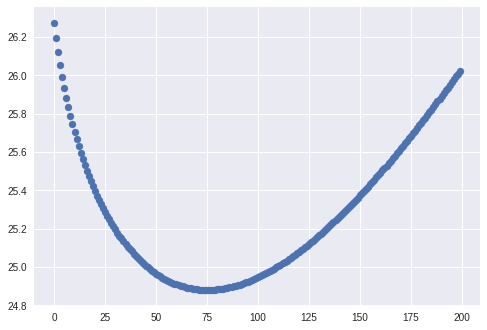

In [0]:
from matplotlib.pyplot import scatter
scatter(alphas, mses);

## What's the intuition? What are we doing?

The `alpha` parameter corresponds to the weight being given to the extra penalty being calculated by [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) (this parameter is sometimes referred to as $\lambda$ in the context of ridge regression).

Normal linear regression (OLS) minimizes the **sum of square error of the residuals**.

Ridge regression minimizes the **sum of square error of the residuals** *AND* **the squared slope of the fit model, times the alpha parameter**.

This is why the MSE for the first model in the for loop (`alpha=0`) is the same as the MSE for linear regression - it's the same model!

As `alpha` is increased, we give more and more penalty to a steep slope. In two or three dimensions this is fairly easy to visualize - beyond, think of it as penalizing coefficient size. Each coefficient represents the slope of an individual dimension (feature) of the model, so ridge regression is just squaring and summing those.

So while `alpha=0` reduces to OLS, as `alpha` approaches infinity eventually the penalty gets so extreme that the model will always output every coefficient as 0 (any non-zero coefficient resulting in a penalty that outweighs whatever improvement in the residuals), and just fit a flat model with intercept at the mean of the dependent variable.

Of course, what we want is somewhere in-between these extremes. Intuitively, what we want to do is apply an appropriate "cost" or penalty to the model for fitting parameters, much like adjusted $R^2$ takes into account the cost of adding complexity to a model. What exactly is an appropriate penalty will vary, so you'll have to put on your model comparison hat and give it a go!

PS - scaling the data helps, as that way this cost is consistent and can be added uniformly across features, and it is simpler to search for the `alpha` parameter.

### Bonus - magic! ✨

Ridge regression doesn't just reduce overfitting and help with the third aspect of well-posed problems (poor generalizability). It can also fix the first two (no unique solution)!

In [19]:
df_tiny = df.sample(10, random_state=27)
print(df_tiny.shape)
X = df_tiny.drop('Price', axis='columns')
y = df_tiny.Price

lin_reg = LinearRegression().fit(X, y)
lin_reg.score(X, y)  # Perfect multi-collinearity!
# NOTE - True OLS would 💥 here
# scikit protects us from actual error, but still gives a poor model

(10, 14)


1.0

In [20]:
ridge_reg = Ridge().fit(X, y)
ridge_reg.score(X, y)  # More plausible (not "perfect")

0.9760119331942763

In [21]:
# Using our earlier test split
mean_squared_error(y_test, lin_reg.predict(X_test))

103.04429449784261

In [22]:
# Ridge generalizes *way* better (and we've not even tuned alpha)
mean_squared_error(y_test, ridge_reg.predict(X_test))

41.79869373639458

In [0]:
# e.g. (x1^2 + x2^2 + ...) * alpha is the extra penalty from Ridge

In [0]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[1e-3, 1e-2, 1e-2, 1, 10, 100, 1000]).fit(X, y)


## And a bit more math

The regularization used by Ridge Regression is also known as **$L^2$ regularization**, due to the squaring of the slopes being summed. This corresponds to [$L^2$ space](https://en.wikipedia.org/wiki/Square-integrable_function), a metric space of square-integrable functions that generally measure what we intuitively think of as "distance" (at least, on a plane) - what is referred to as Euclidean distance.

The other famous norm is $L^1$, also known as [taxicab geometry](https://en.wikipedia.org/wiki/Taxicab_geometry), because it follows the "grid" to measure distance like a car driving around city blocks (rather than going directly like $L^2$). When referred to as a distance this is called "Manhattan distance", and can be used for regularization (see [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics%29), which [uses the $L^1$ norm](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when)).

All this comes down to - regularization means increasing model bias by "watering down" coefficients with a penalty typically based on some sort of distance metric, and thus reducing variance (overfitting the model to the noise in the data). It gives us another lever to try and another tool for our toolchest!

## Putting it all together - one last example

The official scikit-learn documentation has many excellent examples - [this one](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py) illustrates how ridge regression effectively reduces the variance, again by increasing the bias, penalizing coefficients to reduce the effectiveness of features (but also the impact of noise).

```
Due to the few points in each dimension and the straight line that linear regression uses to follow these points as well as it can, noise on the observations will cause great variance as shown in the first plot. Every line’s slope can vary quite a bit for each prediction due to the noise induced in the observations.

Ridge regression is basically minimizing a penalised version of the least-squared function. The penalising shrinks the value of the regression coefficients. Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression
```

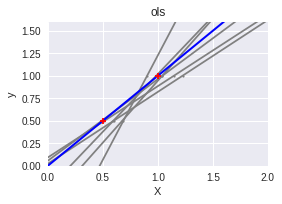

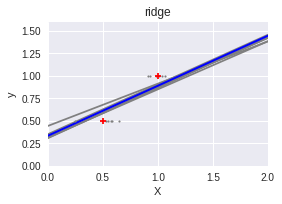

In [0]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

Between the first and the second graph, we have decreased the slope (penalized or watered-down coefficients), but we have less variance between our lines)

# Assignment

Following is data describing characteristics of blog posts, with a target feature of how many comments will be posted in the following 24 hours.

https://archive.ics.uci.edu/ml/datasets/BlogFeedback

Investigate - you can try both linear and ridge. You can also sample to smaller data size and see if that makes ridge more important. Don't forget to scale!

Focus on the training data, but if you want to load and compare to any of the test data files you can also do that.

Note - Ridge may not be that fundamentally superior in this case. That's OK! It's still good to practice both, and see if you can find parameters or sample sizes where ridge does generalize and perform better.

When you've fit models to your satisfaction, answer the following question:

```
Did you find cases where Ridge performed better? If so, describe (alpha parameter, sample size, any other relevant info/processing). If not, what do you think that tells you about the data?
```
**I found an alpha that made the model perform only slightly better with the test data. Although I didn't find anything truly insightful with this dataset, I see how Ridge Regression is useful for building generalizable models. Also, I found it interesting that the RidgeCV model was not able to find a better alpha than I found by using a for loop.**

You can create whatever plots, tables, or other results support your argument. In this case, your target audience is a fellow data scientist, *not* a layperson, so feel free to dig in!

### Cleaning Data

In [33]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df = pd.read_csv('blogData_train.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932,1.521174,-8.0,9.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932,1.521174,-8.0,9.0,0.0,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932,1.521174,-8.0,9.0,0.0,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
#df.dtypes
#df.isnul().sum()

In [39]:
df.shape

(52397, 281)

In [42]:
# Scaling data with sklean scale function
df = pd.DataFrame(scale(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280
0,0.010876,0.112877,-0.052468,0.138521,-0.139108,0.009598,0.116182,-0.020836,0.368246,-0.119031,-0.00031,0.113595,0.0,0.374998,-0.11243,-0.004944,0.129936,-0.052468,0.245038,-0.161788,0.080132,0.119797,-0.480089,0.390503,0.140192,0.598229,1.06407,-0.029263,0.781584,-0.324229,0.581057,0.931022,0.0,0.8758,-0.140659,0.578108,0.92603,0.0,0.876995,-0.022591,0.573526,1.073282,-0.029263,0.763658,-0.249724,0.499465,0.885857,-0.898355,0.910838,-0.015447,-0.337079,-0.229670,-0.249138,-0.346756,0.012103,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,-1.199772,-0.747296,-0.040546,-0.461678,-0.008738,-0.017477,-0.739905,-0.432851,-0.564119,-0.049292,-0.058549,-0.190451,-0.008738,-0.025482,-0.069517,-0.008738,-0.128719,-0.037607,-0.536624,-0.008738,-0.008738,-0.057888,-0.039591,-0.013816,-0.017477,-0.14596,-0.013816,-0.108441,-0.259927,-0.011559,-0.017477,-0.015753,-0.06924,-0.008738,-0.013816,-0.313762,-0.008738,-0.020495,-0.019046,-0.033289,-1.226344,-0.287567,-0.176444,-0.229929,-0.055344,-0.035782,-0.05447,-0.128028,-0.011559,-0.160884,-0.013816,-0.020495,-0.017477,-0.419249,-0.268361,-0.145755,-0.040782,-0.111464,-0.231901,-0.440503,-0.198537,-0.554032,-0.020956,-0.011559,-0.102996,-0.021848,-0.079002,-0.123168,-0.011559,-0.008738,-0.070618,-0.008738,-0.024331,-0.205193,-0.167503,-0.222754,-0.062978,-0.17477,-0.581809,-0.288615,-0.284011,-0.049679,-1.36741,-0.088478,-0.060961,-0.055517,-0.071432,-0.015753,-0.008738,-0.047711,-0.605361,-0.045658,-0.22762,-0.182952,-0.011559,-0.008738,-0.092655,-0.708757,-0.354479,-0.034971,-0.008738,-0.173081,-0.1669,-0.075118,-0.036313,-0.008738,-0.035782,-0.016348,-0.008738,-0.441769,-0.02899,-0.008738,-0.017477,-0.131525,-0.054821,-0.034971,-0.062978,-0.020495,-0.008738,-0.322745,-0.210391,-0.099729,-0.28846,-0.341206,-0.019046,-0.126791,-0.149668,-0.075885,-0.122367,-0.008738,-0.349066,-0.128873,-0.386666,-0.421449,-0.14459,-0.13115,-0.289468,-0.008738,-0.017477,-0.008738,-0.061589,-0.452126,-0.02899,-0.042394,-0.102712,-0.064488,-0.232631,-0.110406,-0.035782,-0.600006,-0.051013,-0.008738,-0.936565,-0.022281,-0.064488,-0.261138,-0.024331,-0.047104,-0.168224,-0.047711,-0.210044,-0.037861,-0.011559,-0.017477,-0.080936,-0.747271,-0.079733,-0.396779,-0.039591,-0.364666,-0.065377,-0.801457,-0.431047,-0.209052,-0.037352,-0.008738,-0.07356,-0.049292,-0.030595,-0.042619,-0.167443,-0.121156,-0.008738,-0.011559,-0.144728,-1.328428,-0.375136,-0.526081,-0.088149,-0.008738,-0.123884,-0.080216,-0.013816,-0.16324,-0.122045,-0.015753,-0.209499,-0.047911,-0.058712,-0.051201,-0.092341,-0.017477,-0.358559,-0.361906,-0.400283,-0.445005,2.227325,-0.439113,-0.399224,-0.43518,-0.448846,-0.454696,2.272362,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836,-0.152885
1,0.010876,0.112877,-0.052468,0.138521,-0.139108,0.009598,0.116182,-0.020836,0.368246,-0.119031,-0.00031,0.113595,0.0,0.374998,-0.11243,-0.004944,0.129936,-0.052468,0.245038,-0.161788,0.080132,0.119797,-0.480089,0.390503,0.140192,0.598229,1.06407,-0.029

In [0]:
# df.mean()
# df.std()

In [0]:
# Dropping columns with all 0's
df = df.drop(columns=[12, 32, 37, 277])

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,278,279,280
0,0.010876,0.112877,-0.052468,0.138521,-0.139108,0.009598,0.116182,-0.020836,0.368246,-0.119031,-0.00031,0.113595,0.374998,-0.11243,-0.004944,0.129936,-0.052468,0.245038,-0.161788,0.080132,0.119797,-0.480089,0.390503,0.140192,0.598229,1.06407,-0.029263,0.781584,-0.324229,0.581057,0.931022,0.8758,-0.140659,0.578108,0.92603,0.876995,-0.022591,0.573526,1.073282,-0.029263,0.763658,-0.249724,0.499465,0.885857,-0.898355,0.910838,-0.015447,-0.337079,-0.229670,-0.249138,-0.346756,0.012103,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,-1.199772,-0.747296,-0.040546,-0.461678,-0.008738,-0.017477,-0.739905,-0.432851,-0.564119,-0.049292,-0.058549,-0.190451,-0.008738,-0.025482,-0.069517,-0.008738,-0.128719,-0.037607,-0.536624,-0.008738,-0.008738,-0.057888,-0.039591,-0.013816,-0.017477,-0.14596,-0.013816,-0.108441,-0.259927,-0.011559,-0.017477,-0.015753,-0.06924,-0.008738,-0.013816,-0.313762,-0.008738,-0.020495,-0.019046,-0.033289,-1.226344,-0.287567,-0.176444,-0.229929,-0.055344,-0.035782,-0.05447,-0.128028,-0.011559,-0.160884,-0.013816,-0.020495,-0.017477,-0.419249,-0.268361,-0.145755,-0.040782,-0.111464,-0.231901,-0.440503,-0.198537,-0.554032,-0.020956,-0.011559,-0.102996,-0.021848,-0.079002,-0.123168,-0.011559,-0.008738,-0.070618,-0.008738,-0.024331,-0.205193,-0.167503,-0.222754,-0.062978,-0.17477,-0.581809,-0.288615,-0.284011,-0.049679,-1.36741,-0.088478,-0.060961,-0.055517,-0.071432,-0.015753,-0.008738,-0.047711,-0.605361,-0.045658,-0.22762,-0.182952,-0.011559,-0.008738,-0.092655,-0.708757,-0.354479,-0.034971,-0.008738,-0.173081,-0.1669,-0.075118,-0.036313,-0.008738,-0.035782,-0.016348,-0.008738,-0.441769,-0.02899,-0.008738,-0.017477,-0.131525,-0.054821,-0.034971,-0.062978,-0.020495,-0.008738,-0.322745,-0.210391,-0.099729,-0.28846,-0.341206,-0.019046,-0.126791,-0.149668,-0.075885,-0.122367,-0.008738,-0.349066,-0.128873,-0.386666,-0.421449,-0.14459,-0.13115,-0.289468,-0.008738,-0.017477,-0.008738,-0.061589,-0.452126,-0.02899,-0.042394,-0.102712,-0.064488,-0.232631,-0.110406,-0.035782,-0.600006,-0.051013,-0.008738,-0.936565,-0.022281,-0.064488,-0.261138,-0.024331,-0.047104,-0.168224,-0.047711,-0.210044,-0.037861,-0.011559,-0.017477,-0.080936,-0.747271,-0.079733,-0.396779,-0.039591,-0.364666,-0.065377,-0.801457,-0.431047,-0.209052,-0.037352,-0.008738,-0.07356,-0.049292,-0.030595,-0.042619,-0.167443,-0.121156,-0.008738,-0.011559,-0.144728,-1.328428,-0.375136,-0.526081,-0.088149,-0.008738,-0.123884,-0.080216,-0.013816,-0.16324,-0.122045,-0.015753,-0.209499,-0.047911,-0.058712,-0.051201,-0.092341,-0.017477,-0.358559,-0.361906,-0.400283,-0.445005,2.227325,-0.439113,-0.399224,-0.43518,-0.448846,-0.454696,2.272362,-0.427399,-0.326158,-0.312402,-0.08286,-0.045171,-0.037836,-0.152885
1,0.010876,0.112877,-0.052468,0.138521,-0.139108,0.009598,0.116182,-0.020836,0.368246,-0.119031,-0.00031,0.113595,0.374998,-0.11243,-0.004944,0.129936,-0.052468,0.245038,-0.161788,0.080132,0.119797,-0.480089,0.390503,0.140192,0.598229,1.06407,-0.029263,0.781584,-0.324229,0.581057,0

In [76]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,278,279,280
count,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.239700e+04,5.

### Defining Variables and Splitting Data

In [0]:
# Making independent and dependent variables
X = df.drop(columns=[280])
y = df[280]

In [0]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

### Linear Regression

In [0]:
# Linear regression instance and fitting model to train data
lin_reg = LinearRegression().fit(X_train, Y_train)

In [71]:
# Printing MSE for train and test datasets -- this model appears to be overfit bc train did better than test
print('Train MSE:', (mean_squared_error(Y_train, lin_reg.predict(X_train))))
print('Test MSE:', (mean_squared_error(Y_test, lin_reg.predict(X_test))))

Train RMSE: 0.6128522709278815
Test RMSE: 0.7115032395058142


In [75]:
# The score is better for the train data as well
print('Train Score:', lin_reg.score(X_train, Y_train))
print('Test Score:', lin_reg.score(X_test, Y_test))

Train Score: 0.3756861890770966
Test Score: 0.32562913832820084


### Ridge Regression

In [81]:
# Fitting model to training data
ridge_reg = Ridge(alpha=0).fit(X_train, Y_train)

# Looking at mean squared error of training data
print('Train MSE:', (mean_squared_error(Y_train, ridge_reg.predict(X_train))))
print('Test MSE:', (mean_squared_error(Y_test, ridge_reg.predict(X_test))))

# The result is essentially the same as the linear regression mse bc alpha is set to 0

Train MSE: 0.6136220506010315
Test MSE: 0.7125536615957923


In [90]:
alphas = []
mses = []

for alpha in np.arange(400, 600, 1):
  ridge_reg_split = Ridge(alpha=alpha).fit(X_train, Y_train)
  mse = mean_squared_error(Y_test, ridge_reg_split.predict(X_test))
  print(alpha, mse)
  alphas.append(alpha)
  mses.append(mse)

400 0.7100100783232121
401 0.7100098700513476
402 0.7100096634043153
403 0.7100094583783956
404 0.710009254969877
405 0.710009053175058
406 0.7100088529902454
407 0.7100086544117551
408 0.710008457435912
409 0.7100082620590499
410 0.7100080682775106
411 0.7100078760876463
412 0.7100076854858163
413 0.7100074964683897
414 0.7100073090317437
415 0.7100071231722643
416 0.7100069388863466
417 0.7100067561703934
418 0.7100065750208165
419 0.7100063954340364
420 0.710006217406482
421 0.7100060409345906
422 0.7100058660148078
423 0.7100056926435878
424 0.710005520817393
425 0.7100053505326948
426 0.7100051817859719
427 0.7100050145737126
428 0.7100048488924121
429 0.7100046847385746
430 0.710004522108713
431 0.7100043609993478
432 0.7100042014070072
433 0.7100040433282288
434 0.7100038867595577
435 0.7100037316975467
436 0.7100035781387577
437 0.7100034260797601
438 0.7100032755171316
439 0.7100031264474574
440 0.7100029788673313
441 0.7100028327733555
442 0.7100026881621387
443 0.71000254503

In [0]:
# from matplotlib.pyplot import scatter
# scatter(alphas, mses);

In [93]:
# Fitting model to training data
ridge_reg = Ridge(alpha=552).fit(X_train, Y_train) # Putting in alpha that minimized error the most

# Looking at mean squared error of training data
print('Train MSE:', (mean_squared_error(Y_train, ridge_reg.predict(X_train))))
print('Test MSE:', (mean_squared_error(Y_test, ridge_reg.predict(X_test))))

# It still overfits the data

Train MSE: 0.6139200153365536
Test MSE: 0.7099951096080855


In [0]:
from sklearn.linear_model import RidgeCV
alpha_range = np.arange(1, 1000, 1)

ridgecv = RidgeCV(alphas=alpha_range).fit(X_train, Y_train)
#ridgecv.score(X, y)

In [99]:
print('Train MSE:', (mean_squared_error(Y_train, ridgecv.predict(X_train))))
print('Test MSE:', (mean_squared_error(Y_test, ridgecv.predict(X_test))))

# Interesting. RidgeCV didn't find a better alpha than I found above

Train MSE: 0.6142879568808577
Test MSE: 0.7100805737027849


# Resources and stretch goals

Resources:
- https://www.quora.com/What-is-regularization-in-machine-learning
- https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022

Stretch goals:
- Revisit past data you've fit OLS models to, and see if there's an `alpha` such that ridge regression results in a model with lower MSE on a train/test split
- Yes, Ridge can be applied to classification! Check out [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), and try it on a problem you previous approached with a different classifier (note - scikit LogisticRegression also automatically penalizes based on the $L^2$ norm, so the difference won't be as dramatic)
- Implement your own function to calculate the full cost that ridge regression is optimizing (the sum of squared residuals + `alpha` times the sum of squared coefficients) - this alone won't fit a model, but you can use it to verify cost of trained models and that the coefficients from the equivalent OLS (without regularization) may have a higher cost